# CNN 구현

In [2]:
%matplotlib inline
# !pip install scikit-image   # Uncomment to install this module
# !pip install matplotlib     # Uncomment to install this module
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
from skimage import io        # Package to simply read images

In [14]:
image = io.imread("bird_pic_by_benjamin_planche.png")

Image shape : (680, 608)


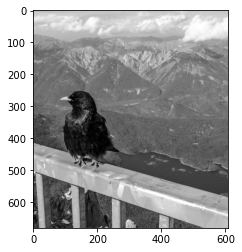

In [15]:
print("Image shape : {}".format(image.shape))
plt.imshow(image, cmap=plt.cm.gray)

#### 이 이미지를 텐서플로에 활용하기 위해 먼저 tensor 로 변환시켜줘야한다

In [16]:
image = tf.convert_to_tensor(image, tf.float32, name='input_images')

In [17]:
image = tf.expand_dims(image, axis=0) # expand tensor
print("Tensor Shape  : {} ".format(image.shape))

Tensor Shape  : (1, 680, 608) 


In [18]:
# 샘플 이미지가 회색조(1개의 채널)이므로 바꿔준다
image = tf.expand_dims(image, axis=-1)
print("Tensor Shape  : {} ".format(image.shape))

Tensor Shape  : (1, 680, 608, 1) 


#### Convolution
- tf.nn.conv2()
- 예시에서는 gausssian blur 를 활용

In [20]:
kernel = tf.constant([[ 1/16, 2/16, 1/16],
                        [2/16, 4/16, 2/16],
                        [1/16, 2/16, 1/16]], tf.float32, name='gaussian_kernel')

In [21]:
kernel = tf.expand_dims(tf.expand_dims(kernel, axis=-1), axis=-1)

In [22]:
blurred_image = tf.nn.conv2d(image, kernel, strides=[1, 1, 1, 1], padding="SAME")

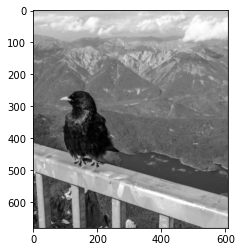

In [23]:
blurred_res = blurred_image.numpy()
# We "unbatch" our result by selecting the first (and only) image; we also remove the depth dimension:
blurred_res = blurred_res[0, ..., 0]

plt.imshow(blurred_res, cmap=plt.cm.gray)

In [24]:
kernel = tf.constant([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]], tf.float32, name="edge_kernel")
kernel = tf.expand_dims(tf.expand_dims(kernel, axis=-1), axis=-1)

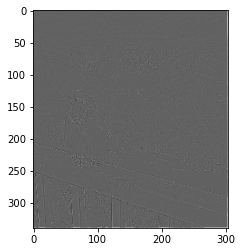

In [25]:
edge_image = tf.nn.conv2d(image, kernel, strides=[1, 2, 2, 1], padding="SAME")
edge_res = edge_image.numpy()[0, ..., 0]
plt.imshow(edge_res, cmap=plt.cm.gray)